### Load modules

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from kalman.kalman import EKFLocalization
from utils.movement_model import MovementModel
from utils.uwb_model import UWBModel

In [3]:
from aremnet.model import ARemNet

aremnet_path = '../aremnet/pretrained/aremnet.ckpt'

aremnet = ARemNet.load_from_checkpoint(aremnet_path)

### Aggregate results

In [11]:
setups = [
    {"environment": "008", "trajectory": "rect", "exclude": "no_people"},
    {"environment": "008", "trajectory": "hourglass", "exclude": "no_people"},
    {"environment": "016", "trajectory": "rect", "exclude": "no_people"},
    {"environment": "016", "trajectory": "hourglass", "exclude": "no_people"},
    {"environment": "008", "trajectory": "no_people_rect", "exclude": " "},
    {"environment": "008", "trajectory": "no_people_hourglass", "exclude": " "},
]

In [ ]:
import os
import numpy as np
import pandas as pd

def get_pickle_base_path(environment):
    return f"experimental_data/pickled/{environment}/"

def create_results_path(setup):
    environment = setup["environment"]
    trajectory = setup["trajectory"]

    path = f"experimental_data/results/{environment}_{trajectory}/"
    if not os.path.exists(path):
        os.makedirs(path)
    return path

def list_experiments(base_path, trajectory, exclude):
    experiments = []
    for file in os.listdir(base_path):
        if os.path.isfile(os.path.join(base_path, file)) \
        and trajectory in file \
        and all([excl not in file for excl in exclude.split(",")]) \
        and file.endswith(".pkl"):
            experiments.append(file.replace(".pkl", ""))
    return experiments

def run_experiment(base_path, experiment_name, results_path):
    uwb_model, movement_model = read_experiment_data(base_path, experiment_name, from_pickle=True)

    ekf_localizer = EKFLocalization(uwb_model, movement_model, aremnet, dt=0.1, process_var=np.diag([0.0001, 0.0001, 0.0001, 0.0001]), meas_var=0.3)
    result = ekf_localizer.run_ekf(mitigate=False)
    result_mitigated = ekf_localizer.run_ekf(mitigate=True)

    np.save(f"{results_path}/{experiment_name}_ekf_result.npy", result)
    np.save(f"{results_path}/{experiment_name}_ekf_result_mitigated.npy", result_mitigated)

def read_experiment_data(base_path, experiment_name, start_idx=0, end_idx=-1, from_pickle=False):
    data_path = f"{base_path}/{experiment_name}"
    if from_pickle:
        data_path = data_path + ".pkl"
    else:
        data_path = data_path + ".txt"

    coord_path = f"{base_path}/beacons_coord.csv"

    environment = experiment_name.split("_")[0]
    
    traj_path = f"experimental_data/{environment}/{experiment_name}_trajectory.csv"

    if os.path.exists(traj_path):
        print(f"Using trajectory from {traj_path}")
    else:
        raise FileNotFoundError(f"Trajectory file {traj_path} not found.")
    
    uwb_model = UWBModel(data_path, coord_path, start_idx, end_idx)

    trajectory_df = pd.read_csv(traj_path)
    movement_model = MovementModel(trajectory_df)

    return uwb_model, movement_model

#### Run reconstruction

In [16]:
for setup in setups:
    environment = setup["environment"]
    trajectory = setup["trajectory"]
    exclude = setup["exclude"]
    
    results_path = create_results_path(setup)
    base_path = get_pickle_base_path(environment)
    experiments = list_experiments(base_path, trajectory, exclude)
    
    print("=====================================================")
    print(f"Environment: {environment}, Trajectory: {trajectory}")
    print(f"Experiments: {experiments}")
    print(f"Result path:", results_path, "\n")

    for experiment in experiments:
        print(f"Running experiment: {experiment}")
        run_experiment(base_path, experiment, results_path)
        print(f"Experiment {experiment} done.\n")

    print("=====================================================")
    print("\n\n")

Environment: 008, Trajectory: rect
Experiments: ['008_moving_rect_6_new', '008_standing_rect_10_new', '008_moving_rect_5_new', '008_standing_rect_8_new', '008_standing_rect_9_new', '008_standing_rect_7_new']
Result path: ../experimental_data/results/008_rect/ 

Running experiment: 008_moving_rect_6_new
Using trajectory from ../experimental_data/008/008_moving_rect_6_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_moving_rect_6_new.pkl
Loaded experimental data. Duration: 19.757002 s


 20%|█▉        | 976/4936 [00:00<00:00, 9754.38it/s]

100%|██████████| 4936/4936 [00:18<00:00, 271.56it/s]


Experiment 008_moving_rect_6_new done.

Running experiment: 008_standing_rect_10_new
Using trajectory from ../experimental_data/008/008_standing_rect_10_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_rect_10_new.pkl
Loaded experimental data. Duration: 21.77236 s


100%|██████████| 5490/5490 [00:20<00:00, 271.55it/s]


Experiment 008_standing_rect_10_new done.

Running experiment: 008_moving_rect_5_new
Using trajectory from ../experimental_data/008/008_moving_rect_5_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_moving_rect_5_new.pkl
Loaded experimental data. Duration: 21.576391 s


100%|██████████| 5611/5611 [00:20<00:00, 272.01it/s]


Experiment 008_moving_rect_5_new done.

Running experiment: 008_standing_rect_8_new
Using trajectory from ../experimental_data/008/008_standing_rect_8_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_rect_8_new.pkl
Loaded experimental data. Duration: 21.362894 s


100%|██████████| 5426/5426 [00:20<00:00, 271.09it/s]


Experiment 008_standing_rect_8_new done.

Running experiment: 008_standing_rect_9_new
Using trajectory from ../experimental_data/008/008_standing_rect_9_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_rect_9_new.pkl
Loaded experimental data. Duration: 20.470951 s


100%|██████████| 5136/5136 [00:19<00:00, 269.06it/s]


Experiment 008_standing_rect_9_new done.

Running experiment: 008_standing_rect_7_new
Using trajectory from ../experimental_data/008/008_standing_rect_7_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_rect_7_new.pkl
Loaded experimental data. Duration: 19.521535 s


100%|██████████| 4830/4830 [00:18<00:00, 268.19it/s]


Experiment 008_standing_rect_7_new done.




Environment: 008, Trajectory: hourglass
Experiments: ['008_standing_hourglass_5_new', '008_moving_hourglass_5_new', '008_moving_hourglass_6_new', '008_standing_hourglass_7_new', '008_standing_hourglass_6_new']
Result path: ../experimental_data/results/008_hourglass/ 

Running experiment: 008_standing_hourglass_5_new
Using trajectory from ../experimental_data/008/008_standing_hourglass_5_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_hourglass_5_new.pkl
Loaded experimental data. Duration: 22.323324 s


100%|██████████| 5493/5493 [00:20<00:00, 270.13it/s]


Experiment 008_standing_hourglass_5_new done.

Running experiment: 008_moving_hourglass_5_new
Using trajectory from ../experimental_data/008/008_moving_hourglass_5_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_moving_hourglass_5_new.pkl
Loaded experimental data. Duration: 22.112845 s


100%|██████████| 5527/5527 [00:20<00:00, 270.14it/s]


Experiment 008_moving_hourglass_5_new done.

Running experiment: 008_moving_hourglass_6_new
Using trajectory from ../experimental_data/008/008_moving_hourglass_6_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_moving_hourglass_6_new.pkl
Loaded experimental data. Duration: 23.784227 s


100%|██████████| 6224/6224 [00:23<00:00, 269.33it/s]


Experiment 008_moving_hourglass_6_new done.

Running experiment: 008_standing_hourglass_7_new
Using trajectory from ../experimental_data/008/008_standing_hourglass_7_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_hourglass_7_new.pkl
Loaded experimental data. Duration: 22.932285 s


100%|██████████| 5502/5502 [00:20<00:00, 270.01it/s]


Experiment 008_standing_hourglass_7_new done.

Running experiment: 008_standing_hourglass_6_new
Using trajectory from ../experimental_data/008/008_standing_hourglass_6_new_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_standing_hourglass_6_new.pkl
Loaded experimental data. Duration: 22.827348 s


100%|██████████| 5571/5571 [00:20<00:00, 270.88it/s]


Experiment 008_standing_hourglass_6_new done.




Environment: 016, Trajectory: rect
Experiments: ['016_standing_rect_5', '016_standing_rect', '016_moving_rect', '016_moving_rect_2', '016_standing_rect_10', '016_standing_rect_2', '016_standing_rect_8']
Result path: ../experimental_data/results/016_rect/ 

Running experiment: 016_standing_rect_5
Using trajectory from ../experimental_data/016/016_standing_rect_5_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_rect_5.pkl
Loaded experimental data. Duration: 21.416891 s


100%|██████████| 4130/4130 [00:15<00:00, 272.18it/s]


Experiment 016_standing_rect_5 done.

Running experiment: 016_standing_rect
Using trajectory from ../experimental_data/016/016_standing_rect_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_rect.pkl
Loaded experimental data. Duration: 22.479322 s


100%|██████████| 4223/4223 [00:15<00:00, 271.18it/s]


Experiment 016_standing_rect done.

Running experiment: 016_moving_rect
Using trajectory from ../experimental_data/016/016_moving_rect_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_moving_rect.pkl
Loaded experimental data. Duration: 23.113275 s


100%|██████████| 5119/5119 [00:18<00:00, 269.92it/s]


Experiment 016_moving_rect done.

Running experiment: 016_moving_rect_2
Using trajectory from ../experimental_data/016/016_moving_rect_2_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_moving_rect_2.pkl
Loaded experimental data. Duration: 23.305897 s


100%|██████████| 4814/4814 [00:17<00:00, 269.99it/s]


Experiment 016_moving_rect_2 done.

Running experiment: 016_standing_rect_10
Using trajectory from ../experimental_data/016/016_standing_rect_10_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_rect_10.pkl
Loaded experimental data. Duration: 22.874285 s


100%|██████████| 4207/4207 [00:15<00:00, 270.53it/s]


Experiment 016_standing_rect_10 done.

Running experiment: 016_standing_rect_2
Using trajectory from ../experimental_data/016/016_standing_rect_2_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_rect_2.pkl
Loaded experimental data. Duration: 23.015785 s


100%|██████████| 4943/4943 [00:18<00:00, 270.20it/s]


Experiment 016_standing_rect_2 done.

Running experiment: 016_standing_rect_8
Using trajectory from ../experimental_data/016/016_standing_rect_8_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_rect_8.pkl
Loaded experimental data. Duration: 23.512395 s


100%|██████████| 4779/4779 [00:17<00:00, 269.67it/s]


Experiment 016_standing_rect_8 done.




Environment: 016, Trajectory: hourglass
Experiments: ['016_standing_hourglass_4', '016_standing_hourglass_7', '016_moving_hourglass', '016_standing_hourglass_2', '016_standing_hourglass', '016_standing_hourglass_6', '016_standing_hourglass_3']
Result path: ../experimental_data/results/016_hourglass/ 

Running experiment: 016_standing_hourglass_4
Using trajectory from ../experimental_data/016/016_standing_hourglass_4_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_4.pkl
Loaded experimental data. Duration: 24.05575 s


100%|██████████| 4575/4575 [00:16<00:00, 271.36it/s]


Experiment 016_standing_hourglass_4 done.

Running experiment: 016_standing_hourglass_7
Using trajectory from ../experimental_data/016/016_standing_hourglass_7_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_7.pkl
Loaded experimental data. Duration: 24.146705 s


100%|██████████| 4798/4798 [00:17<00:00, 271.74it/s]


Experiment 016_standing_hourglass_7 done.

Running experiment: 016_moving_hourglass
Using trajectory from ../experimental_data/016/016_moving_hourglass_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_moving_hourglass.pkl
Loaded experimental data. Duration: 26.082076 s


100%|██████████| 5536/5536 [00:20<00:00, 269.53it/s]


Experiment 016_moving_hourglass done.

Running experiment: 016_standing_hourglass_2
Using trajectory from ../experimental_data/016/016_standing_hourglass_2_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_2.pkl
Loaded experimental data. Duration: 26.981025 s


100%|██████████| 5239/5239 [00:19<00:00, 272.88it/s]


Experiment 016_standing_hourglass_2 done.

Running experiment: 016_standing_hourglass
Using trajectory from ../experimental_data/016/016_standing_hourglass_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass.pkl
Loaded experimental data. Duration: 24.683166 s


100%|██████████| 4046/4046 [00:14<00:00, 273.61it/s]


Experiment 016_standing_hourglass done.

Running experiment: 016_standing_hourglass_6
Using trajectory from ../experimental_data/016/016_standing_hourglass_6_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_6.pkl
Loaded experimental data. Duration: 23.450747 s


100%|██████████| 4382/4382 [00:16<00:00, 270.66it/s]


Experiment 016_standing_hourglass_6 done.

Running experiment: 016_standing_hourglass_3
Using trajectory from ../experimental_data/016/016_standing_hourglass_3_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_3.pkl
Loaded experimental data. Duration: 24.693672 s


100%|██████████| 4193/4193 [00:15<00:00, 271.60it/s]


Experiment 016_standing_hourglass_3 done.




Environment: 008, Trajectory: no_people_rect
Experiments: ['008_no_people_rect_3', '008_no_people_rect_2', '008_no_people_rect_5', '008_no_people_rect_6']
Result path: ../experimental_data/results/008_no_people_rect/ 

Running experiment: 008_no_people_rect_3
Using trajectory from ../experimental_data/008/008_no_people_rect_3_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_rect_3.pkl
Loaded experimental data. Duration: 20.285969 s


100%|██████████| 5369/5369 [00:19<00:00, 271.29it/s]


Experiment 008_no_people_rect_3 done.

Running experiment: 008_no_people_rect_2
Using trajectory from ../experimental_data/008/008_no_people_rect_2_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_rect_2.pkl
Loaded experimental data. Duration: 20.314967 s


100%|██████████| 5442/5442 [00:20<00:00, 271.30it/s]


Experiment 008_no_people_rect_2 done.

Running experiment: 008_no_people_rect_5
Using trajectory from ../experimental_data/008/008_no_people_rect_5_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_rect_5.pkl
Loaded experimental data. Duration: 20.304454 s


100%|██████████| 5454/5454 [00:20<00:00, 272.16it/s]


Experiment 008_no_people_rect_5 done.

Running experiment: 008_no_people_rect_6
Using trajectory from ../experimental_data/008/008_no_people_rect_6_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_rect_6.pkl
Loaded experimental data. Duration: 20.210559 s


100%|██████████| 5270/5270 [00:19<00:00, 272.44it/s]


Experiment 008_no_people_rect_6 done.




Environment: 008, Trajectory: no_people_hourglass
Experiments: ['008_no_people_hourglass_3', '008_no_people_hourglass_6', '008_no_people_hourglass_5']
Result path: ../experimental_data/results/008_no_people_hourglass/ 

Running experiment: 008_no_people_hourglass_3
Using trajectory from ../experimental_data/008/008_no_people_hourglass_3_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_hourglass_3.pkl
Loaded experimental data. Duration: 23.283765 s


100%|██████████| 6197/6197 [00:22<00:00, 271.19it/s]


Experiment 008_no_people_hourglass_3 done.

Running experiment: 008_no_people_hourglass_6
Using trajectory from ../experimental_data/008/008_no_people_hourglass_6_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_hourglass_6.pkl
Loaded experimental data. Duration: 23.16823 s


100%|██████████| 6068/6068 [00:22<00:00, 271.01it/s]


Experiment 008_no_people_hourglass_6 done.

Running experiment: 008_no_people_hourglass_5
Using trajectory from ../experimental_data/008/008_no_people_hourglass_5_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_hourglass_5.pkl
Loaded experimental data. Duration: 23.135786 s


100%|██████████| 6062/6062 [00:22<00:00, 270.95it/s]


Experiment 008_no_people_hourglass_5 done.






#### Results

In [41]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

import matplotlib.pyplot as plt
import seaborn as sns

def get_dtw_pairwise_errors(traj_est, traj_gt):
    _, path = fastdtw(traj_est, traj_gt, dist=euclidean)
    return [euclidean(traj_est[i], traj_gt[j]) for i, j in path]

data_dict = dict()

for setup in setups:
    environment = setup["environment"]
    trajectory = setup["trajectory"]
    exclude = setup["exclude"]

    data_dict[f"{environment}_{trajectory}"] = []

    results_path = create_results_path(setup)
    base_path = get_pickle_base_path(environment)
    experiments = list_experiments(base_path, trajectory, exclude)
    

    for experiment in experiments:
        result = np.load(f"{results_path}/{experiment}_ekf_result.npy", allow_pickle=True).item()
        result_mit = np.load(f"{results_path}/{experiment}_ekf_result_mitigated.npy", allow_pickle=True).item()

        traj_gt = result["true_positions"]
        traj_est = result["trajectory"]
        traj_mit = result_mit["trajectory"]

        errs_non = get_dtw_pairwise_errors(traj_est, traj_gt)
        errs_mit = get_dtw_pairwise_errors(traj_mit, traj_gt)

        errs_non = np.array(errs_non) * 100
        errs_mit = np.array(errs_mit) * 100
        
        mae_non = np.mean(np.abs(errs_non))
        mae_mit = np.mean(np.abs(errs_mit))

        data_dict[f"{environment}_{trajectory}"].append({
            "name": experiment,
            "errs_non": errs_non,
            "errs_mit": errs_mit,
            "mae_non": mae_non,
            "mae_mit": mae_mit
        })

        print(f"Experiment: {experiment}")
        print(f"MAE (non-mitigated): {mae_non:.3f} m")
        print(f"MAE (mitigated): {mae_mit:.3f} m")
        print(f"Improvement (%): {(mae_non - mae_mit) / mae_non * 100:.2f}%")


Experiment: 008_moving_rect_6_new
MAE (non-mitigated): 10.060 m
MAE (mitigated): 3.747 m
Improvement (%): 62.76%
Experiment: 008_standing_rect_10_new
MAE (non-mitigated): 16.532 m
MAE (mitigated): 5.259 m
Improvement (%): 68.19%
Experiment: 008_moving_rect_5_new
MAE (non-mitigated): 14.163 m
MAE (mitigated): 4.410 m
Improvement (%): 68.86%
Experiment: 008_standing_rect_8_new
MAE (non-mitigated): 15.756 m
MAE (mitigated): 4.617 m
Improvement (%): 70.69%
Experiment: 008_standing_rect_9_new
MAE (non-mitigated): 16.664 m
MAE (mitigated): 4.438 m
Improvement (%): 73.37%
Experiment: 008_standing_rect_7_new
MAE (non-mitigated): 15.867 m
MAE (mitigated): 4.321 m
Improvement (%): 72.76%
Experiment: 008_standing_hourglass_5_new
MAE (non-mitigated): 9.073 m
MAE (mitigated): 5.069 m
Improvement (%): 44.13%
Experiment: 008_moving_hourglass_5_new
MAE (non-mitigated): 8.104 m
MAE (mitigated): 4.494 m
Improvement (%): 44.55%
Experiment: 008_moving_hourglass_6_new
MAE (non-mitigated): 12.526 m
MAE (mit

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


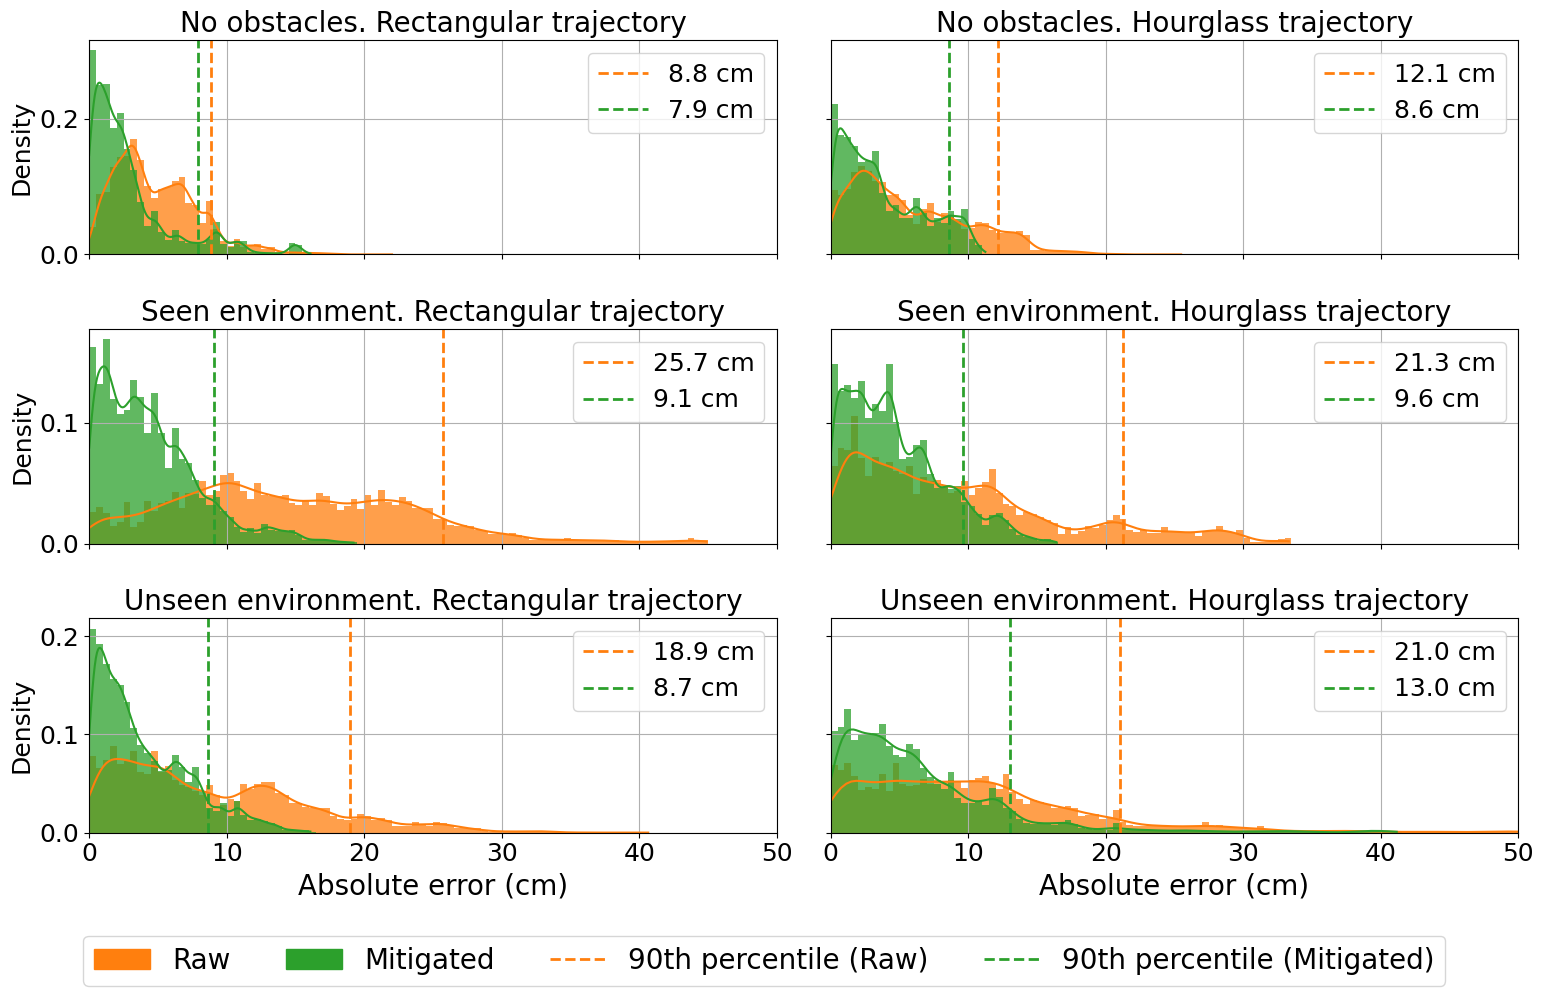

In [42]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fig, axs = plt.subplots(3, 2, figsize=(16, 10), sharex=True, sharey='row')

font = {'size': 20}
plt.rc('font', **font)

position_mapping = {
    "008_rect": (1, 0),
    "008_hourglass": (1, 1),
    "016_rect": (2, 0),
    "016_hourglass": (2, 1),
    "008_no_people_rect": (0, 0),
    "008_no_people_hourglass": (0, 1)
}

name_mapping = {
    "008_rect": "Seen environment. Rectangular trajectory",
    "008_hourglass": "Seen environment. Hourglass trajectory",
    "016_rect": "Unseen environment. Rectangular trajectory",
    "016_hourglass": "Unseen environment. Hourglass trajectory",
    "008_no_people_rect": "No obstacles. Rectangular trajectory",
    "008_no_people_hourglass": "No obstacles. Hourglass trajectory"
}

environments_errors_mitigated = dict()
environments_errors_non_mitigated = dict()

relative_improvements = dict()
absolute_maes = dict()

for setup, experiments in data_dict.items():
    row, col = position_mapping[setup]
    all_dtw_errors_non_mitigated = []
    all_dtw_errors_mitigated = []
    total_experiments = 0
    relative_improvements[setup] = []
    absolute_maes[setup] = []

    for experiment in experiments:     
        all_dtw_errors_non_mitigated.extend(experiment["errs_non"])
        all_dtw_errors_mitigated.extend(experiment["errs_mit"])
        
        environment = experiment["name"].split("_")[0]
        if "no_people" in experiment["name"]:
            environment = "008_no_people"
        environments_errors_non_mitigated.setdefault(environment, []).extend(experiment["errs_non"])
        environments_errors_mitigated.setdefault(environment, []).extend(experiment["errs_mit"])

        relative_improvement = (experiment["mae_non"] - experiment["mae_mit"]) / experiment["mae_non"] * 100
        relative_improvements[setup].append(relative_improvement)

        absolute_mae_dict = {
            "non_mitigated": experiment["mae_non"],
            "mitigated": experiment["mae_mit"]
        }
        absolute_maes[setup].append(absolute_mae_dict)

        total_experiments += 1

    bin_width = 0.5
    bins = np.arange(0, max(max(all_dtw_errors_non_mitigated), max(all_dtw_errors_mitigated)) + bin_width, bin_width)

    sns.histplot(all_dtw_errors_non_mitigated, stat="density", bins=bins, ax=axs[row, col], alpha=0.75, edgecolor=None, kde=True, color="#ff7f0e")
    sns.histplot(all_dtw_errors_mitigated, stat="density", bins=bins, ax=axs[row, col], alpha=0.75, edgecolor=None, kde=True, color="#2ca02c")

    non_mitigated_90th = np.percentile(all_dtw_errors_non_mitigated, 90)
    mitigated_90th = np.percentile(all_dtw_errors_mitigated, 90)

    line_raw = axs[row, col].axvline(non_mitigated_90th, linestyle='--', label=f"{non_mitigated_90th:.1f} cm", color="#ff7f0e", linewidth=2)
    line_mit = axs[row, col].axvline(mitigated_90th, linestyle='--', label=f"{mitigated_90th:.1f} cm", color="#2ca02c", linewidth=2)

    axs[row, col].legend(loc='upper right', fontsize=18)

    axs[row, col].set_title(name_mapping[setup], fontsize=20)
    axs[row, col].set_xlabel("Absolute error (cm)", fontsize=20)
    axs[row, col].set_ylabel("Density")
    axs[row, col].grid(True)
    axs[row, col].set_xlim(0, 50)

print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

raw_patch = mpatches.Patch(label='Raw', color="#ff7f0e")
mitigated_patch = mpatches.Patch(label='Mitigated', color="#2ca02c")
raw_line = mlines.Line2D([], [], linestyle='--', label='90th percentile (Raw)', color="#ff7f0e", linewidth=2)
mitigated_line = mlines.Line2D([], [], linestyle='--', label='90th percentile (Mitigated)', color="#2ca02c", linewidth=2)

fig.legend(handles=[raw_patch, mitigated_patch, raw_line, mitigated_line],
           loc='lower center', ncol=4, fontsize=20, frameon=True, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.savefig("dtw_errors.pdf", bbox_inches='tight')

In [43]:
rel_imp_data = []
rel_imp_labels = []

name_mapping_boxplot = {
    "008_rect": "SR",
    "008_hourglass": "SH",
    "016_rect": "UR",
    "016_hourglass": "UH",
    "008_no_people_rect": "NR",
    "008_no_people_hourglass": "NH"
}

for setup, improvements in relative_improvements.items():
    rel_imp_data.append(improvements)
    rel_imp_labels.append(name_mapping_boxplot[setup])

for label, improvement in zip(rel_imp_labels, rel_imp_data):
    q1 = np.percentile(improvement, 25)
    q3 = np.percentile(improvement, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_improvement = [x for x in improvement if lower_bound <= x <= upper_bound]
    print(f"{label}: median = {np.median(filtered_improvement):.2f}, std = {np.std(filtered_improvement):.2f}")

SR: median = 69.78, std = 3.53
SH: median = 47.41, std = 5.85
UR: median = 57.77, std = 3.03
UH: median = 41.35, std = 3.25
NR: median = 38.61, std = 1.91
NH: median = 33.25, std = 3.00


SR-R: median = 15.87, std = 0.89
SR-M: median = 4.42, std = 0.11
SH-R: median = 8.59, std = 0.60
SH-M: median = 4.49, std = 0.38
UR-R: median = 9.26, std = 1.71
UR-M: median = 3.77, std = 0.53
UH-R: median = 11.92, std = 1.24
UH-M: median = 7.01, std = 1.17
NR-R: median = 4.95, std = 0.29
NR-M: median = 2.99, std = 0.24
NH-R: median = 5.76, std = 0.13
NH-M: median = 3.83, std = 0.21


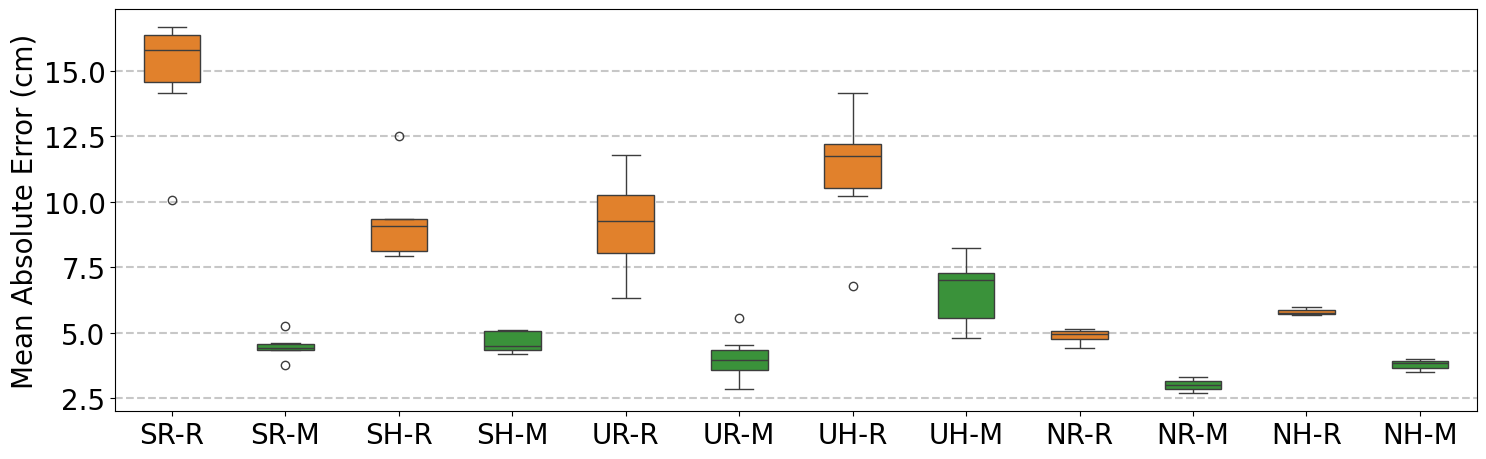

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_data = []
boxplot_labels = []

for setup, maes in absolute_maes.items():
    non_mitigated_maes = [mae["non_mitigated"] for mae in maes]
    mitigated_maes = [mae["mitigated"] for mae in maes]
    
    boxplot_data.append(non_mitigated_maes)
    boxplot_labels.append(f"{name_mapping_boxplot[setup]}-R")
    
    boxplot_data.append(mitigated_maes)
    boxplot_labels.append(f"{name_mapping_boxplot[setup]}-M")

for label, improvement in zip(boxplot_labels, boxplot_data):
    q1 = np.percentile(improvement, 25)
    q3 = np.percentile(improvement, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_improvement = [x for x in improvement if lower_bound <= x <= upper_bound]
    print(f"{label}: median = {np.median(filtered_improvement):.2f}, std = {np.std(filtered_improvement):.2f}")
    
boxplot_colors = [
    "#ff7f0e" if "-R" in label else "#2ca02c"
    for label in boxplot_labels
]

plt.figure(figsize=(15, 5))
sns.boxplot(data=boxplot_data, palette=boxplot_colors, width=0.5)
plt.xticks(ticks=range(len(boxplot_labels)), labels=boxplot_labels)
plt.ylabel("Mean Absolute Error (cm)")
plt.grid(axis="y", linestyle="--", alpha=0.7, linewidth=1.5)
plt.tight_layout()

plt.savefig("dtw_errors_mae_box.pdf", bbox_inches='tight')

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D

def plot_trajectory_thesis_dual(result1, result_mitigated1, trajectory1,
                                result2, result_mitigated2, trajectory2,
                                annotations1, annotation2, 
                                uwb_model, flip_axes=False, save_path=None):    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    all_handles = []
    all_labels = []

    def plot_single(ax, result, result_mitigated, trajectory, title, y_axis_label=True, annotations=None):
        for i, (uwb_id, pos) in enumerate(uwb_model.origins.items()):
            width, height = 0.20, 0.07
            adj_pos = (pos[0] - width / 2, pos[1] - height / 2) if flip_axes else (pos[1] - width / 2, pos[0] - height / 2)
            rect = patches.Rectangle(adj_pos, width, height, color='black', label='Anchors' if i == 0 else '')
            transform = Affine2D().rotate_deg_around(pos[0], pos[1], -45 + i * 90) + ax.transData if flip_axes else Affine2D().rotate_deg_around(pos[1], pos[0], -45 + i * 90) + ax.transData
            rect.set_transform(transform)
            ax.add_patch(rect)
            if i == 0:
                all_handles.append(rect)
                all_labels.append("Anchors")

        if flip_axes:
            ground_truth_line, = ax.plot(trajectory[:, 0], trajectory[:, 1], label='Ground Truth', linewidth=3, color='black', linestyle='--')
            raw_line, = ax.plot(result["trajectory"][:, 0], result["trajectory"][:, 1], label='Raw', linewidth=3, alpha=0.8, color="#ff7f0e")
            if result_mitigated is not None:
                mitigated_line, = ax.plot(result_mitigated["trajectory"][:, 0], result_mitigated["trajectory"][:, 1], label='Mitigated', linewidth=3, alpha=0.8, color="#2ca02c")
            else:
                mitigated_line = None
        else:
            ground_truth_line, = ax.plot(trajectory[:, 1], trajectory[:, 0], label='Ground Truth', linewidth=3, color='black', linestyle='--')
            raw_line, = ax.plot(result["trajectory"][:, 1], result["trajectory"][:, 0], label='Raw', linewidth=3, alpha=0.8, color="#ff7f0e")
            if result_mitigated is not None:
                mitigated_line, = ax.plot(result_mitigated["trajectory"][:, 1], result_mitigated["trajectory"][:, 0], label='Mitigated', linewidth=3, alpha=0.8, color="#2ca02c")
            else:
                mitigated_line = None

        if annotations:
            for x_start, y_start, x_end, y_end in annotations:
                ax1.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
                            arrowprops=dict(arrowstyle='->', color='black', lw=2))
                
        all_handles.extend([ground_truth_line, raw_line])
        all_labels.extend(['Ground Truth', 'Raw'])
        if mitigated_line:
            all_handles.append(mitigated_line)
            all_labels.append('Mitigated')

        ax.set_aspect('equal', adjustable='box')
        ax.grid()

        ax.set_title(title, fontsize=18)

        if y_axis_label:
            ax.set_xlabel("X Position (m)" if flip_axes else "Y Position (m)")
        ax.set_ylabel("Y Position (m)" if flip_axes else "X Position (m)")

    plot_single(ax1, result1, result_mitigated1, trajectory1, "No obstacles", y_axis_label=True, annotations=annotations1)
    plot_single(ax2, result2, result_mitigated2, trajectory2, "Unseen environment", y_axis_label=True, annotations=annotation2)

    by_label = dict(zip(all_labels, all_handles))
    fig.legend(by_label.values(), by_label.keys(),
               loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.01))

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()


In [ ]:
font = {'size': 18}
plt.rc('font', **font)

In [ ]:
trajectory_for_plot = "008_no_people_hourglass_3"
result_folder = "experimental_data/results/008_no_people_hourglass/"
result_hourglass_los = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result.npy", allow_pickle=True).item()
result_mitigated_hourglass_los = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result_mitigated.npy", allow_pickle=True).item()

data_path = "experimental_data/pickled/008/"

uwb_model, movement_model = read_experiment_data(data_path, trajectory_for_plot, from_pickle=True)

tile_size_cm = 48

hourglass_traj_keypoints = [
    (7, 2), (2, 12), (7, 12), (2, 2), (7, 2),
]
hourglass_traj_008 = np.array(hourglass_traj_keypoints) * tile_size_cm / 100

annotations = [
    (6.5, 2.7, 6.0, 3.1),
    (0.1, 2.16, 0.750, 2.16)
]

Using trajectory from ../experimental_data/008/008_no_people_hourglass_3_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_hourglass_3.pkl
Loaded experimental data. Duration: 23.283765 s


In [ ]:
trajectory_for_plot = "008_no_people_rect_2"
result_folder = "experimental_data/results/008_no_people_rect/"
result_rect_los = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result.npy", allow_pickle=True).item()
result_mitigated_rect_los = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result_mitigated.npy", allow_pickle=True).item()

data_path = "experimental_data/pickled/008/"

uwb_model, movement_model = read_experiment_data(data_path, trajectory_for_plot, from_pickle=True)

tile_size_cm = 48

rect_traj_keypoints = [
    (2, 2), (2, 12), (7, 12), (7, 2), (2, 2),
]
rect_traj_008 = np.array(rect_traj_keypoints) * tile_size_cm / 100

Using trajectory from ../experimental_data/008/008_no_people_rect_2_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/008//008_no_people_rect_2.pkl
Loaded experimental data. Duration: 20.314967 s


In [ ]:
trajectory_for_plot = "016_standing_hourglass_6"
result_folder = "experimental_data/results/016_hourglass/"
result_hourglass_016 = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result.npy", allow_pickle=True).item()
result_mitigated_hourglass_016 = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result_mitigated.npy", allow_pickle=True).item()

data_path = "experimental_data/pickled/016/"

uwb_model, movement_model = read_experiment_data(data_path, trajectory_for_plot, from_pickle=True)

tile_size_cm = 50

hourglass_traj_keypoints = [
    (7, 2), (2, 12), (7, 12), (2, 2), (7, 2),
]
hourglass_traj_016 = np.array(hourglass_traj_keypoints) * tile_size_cm / 100

Using trajectory from ../experimental_data/016/016_standing_hourglass_6_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_standing_hourglass_6.pkl
Loaded experimental data. Duration: 23.450747 s


In [ ]:
trajectory_for_plot = "016_moving_rect"
result_folder = "experimental_data/results/016_rect/"
result_rect_016 = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result.npy", allow_pickle=True).item()
result_mitigated_rect_016 = np.load(f"{result_folder}/{trajectory_for_plot}_ekf_result_mitigated.npy", allow_pickle=True).item()

data_path = "experimental_data/pickled/016/"

uwb_model, movement_model = read_experiment_data(data_path, trajectory_for_plot, from_pickle=True)

rect_traj_keypoints = [
    (2, 2), (2, 12), (7, 12), (7, 2), (2, 2),
]

rect_traj_016 = np.array(rect_traj_keypoints) * tile_size_cm / 100

Using trajectory from ../experimental_data/016/016_moving_rect_trajectory.csv
Loading data from pickle file: ../experimental_data/pickled/016//016_moving_rect.pkl
Loaded experimental data. Duration: 23.113275 s


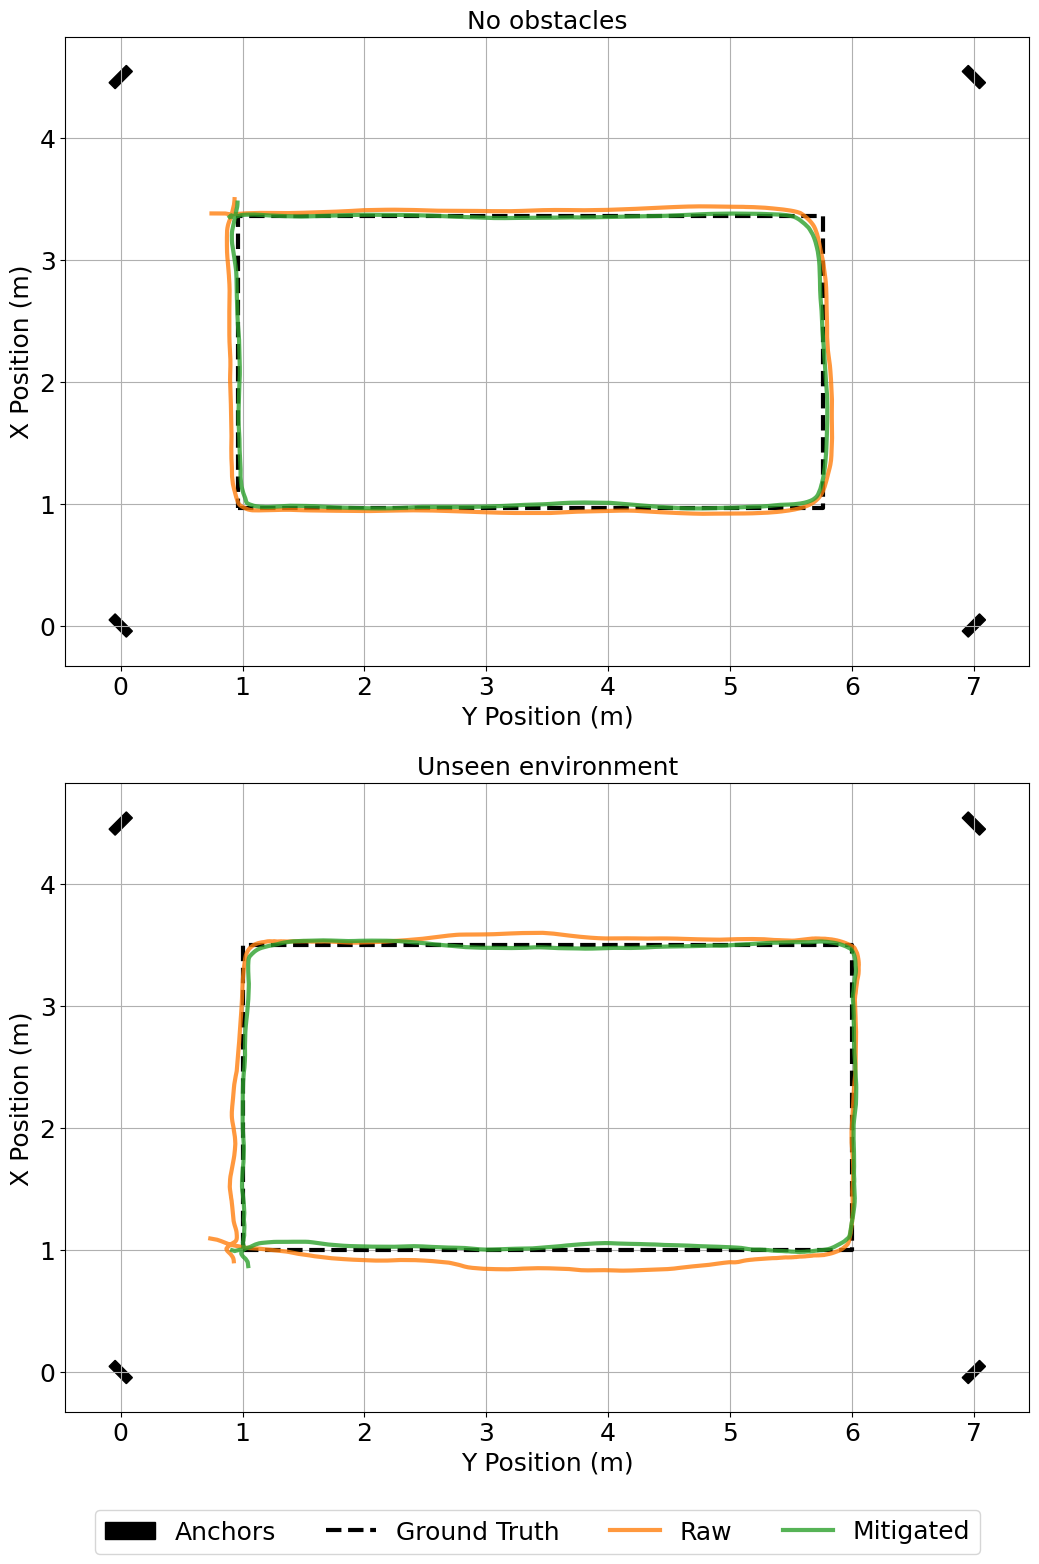

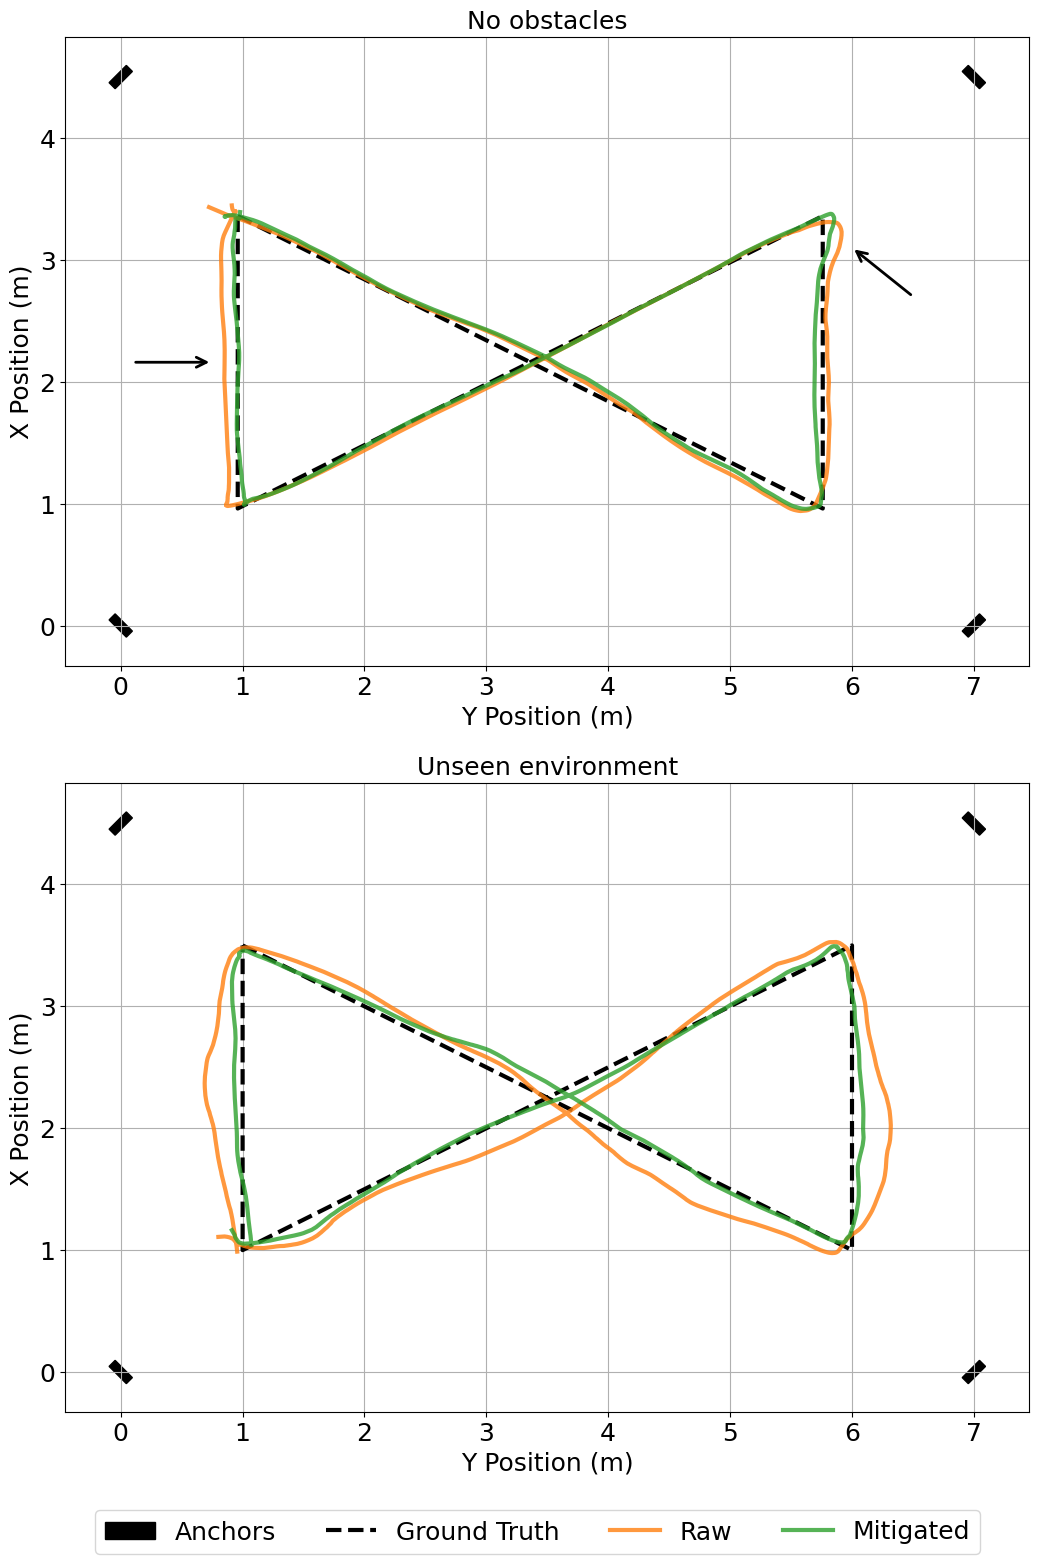

In [51]:
plot_trajectory_thesis_dual(result_rect_los, result_mitigated_rect_los, rect_traj_008,
                            result_rect_016, result_mitigated_rect_016, rect_traj_016,
                            None, None,
                            uwb_model, flip_axes=False, save_path="rect_trajectory.pdf")

plot_trajectory_thesis_dual(result_hourglass_los, result_mitigated_hourglass_los, hourglass_traj_008,
                            result_hourglass_016, result_mitigated_hourglass_016, hourglass_traj_016,
                            annotations1=annotations, annotation2=None,
                            uwb_model=uwb_model, flip_axes=False, save_path="hourglass_trajectory.pdf")